# Import and Checks

In [448]:
# Import data.csv
import pandas as pd
df = pd.read_csv('data.csv')
# Previews
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [450]:
# Check missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [451]:
# Check statistics of Age
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


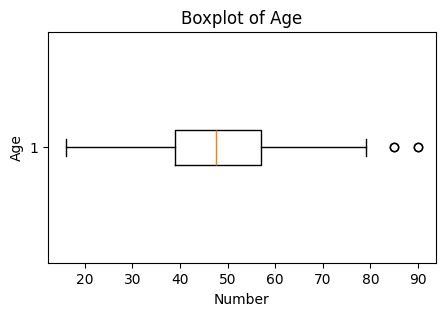

In [452]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.boxplot(x=df['Age'], vert=False)  # ใช้ vert=False แทน orientation='horizontal'

plt.title('Boxplot of Age')
plt.xlabel('Number')
plt.ylabel('Age')

plt.show()

C:\Users\majis\AppData\Local\Temp\ipykernel_24484\78920145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='class', y='Age', data=df, palette=['green','red'])


<Axes: xlabel='class', ylabel='Age'>

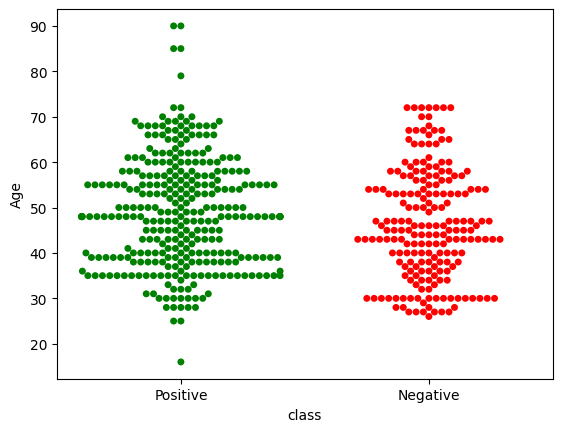

In [453]:
import seaborn as sns
sns.swarmplot(x='class', y='Age', data=df, palette=['green','red'])

In [454]:
# Check class imbalance (Will affect Model Performance)
print("Total Count :",df['class'].count(),"\n====================")
print("Positive Class :",df['class'][df['class'] == "Positive"].count())
print("Negative Class :",df['class'][df['class'] == "Negative"].count())

Total Count : 520 
Positive Class : 320
Negative Class : 200


# Drop duplicates

In [455]:
print("Before →", df.shape)
df.drop_duplicates(inplace=True)
print("✔ Removed duplicates →", df.shape)

Before → (520, 17)
✔ Removed duplicates → (251, 17)


# Eliminate Outliers

In [456]:
import numpy as np

print("Old Shape:", df.shape)

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Delete outliers
df = df[(df['Age'] >= lower) & (df['Age'] <= upper)]

print("New Shape:", df.shape)

Old Shape: (251, 17)
New Shape: (250, 17)


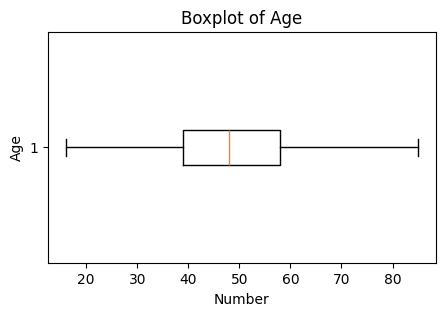

In [457]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.boxplot(x=df['Age'], vert=False)  # ใช้ vert=False แทน orientation='horizontal'

plt.title('Boxplot of Age')
plt.xlabel('Number')
plt.ylabel('Age')

plt.show()

# Independent Test

In [458]:
# ตรวจสอบความมีผลของ features ทั้งหมดต่อ class
import pandas as pd
from scipy.stats import chi2_contingency

# สมมติ DataFrame ของคุณ
# df = pd.read_csv("your_data.csv")  # ถ้าใช้ไฟล์ CSV

# ตัวแปรตาม
dependent_var = 'class'

# เลือกตัวแปรเชิงคุณภาพทั้งหมด ยกเว้นตัวแปรตาม
qualitative_cols = df.select_dtypes(include=['object']).columns.tolist()
independent_vars = [col for col in qualitative_cols if col != dependent_var]

# Loop ผ่านตัวแปรอิสระแต่ละตัวเพื่อทดสอบความสัมพันธ์กับตัวแปรตาม
results = {}
for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[var] = {'chi2': chi2, 'p-value': p, 'dof': dof}

# ANSI color codes
RED = '\033[91m'
GREEN = '\033[92m'
BOLD = '\033[1m'
RESET = '\033[0m'

significant_vars = []
non_significant_vars = []

# Header
print(f"{BOLD}=================== Chi-Squared Test Results ==================={RESET}")
print('-'*65)
print(f"{BOLD}{'Variable':<20} {'Chi2':<10} {'p-value':<10} {'dof':<5} Result{RESET}")
print('-'*65)

# แสดงผล
for var, res in results.items():
    if res['p-value'] < 0.05:
        color = GREEN
        significance = "มีความสัมพันธ์ทางสถิติ O"
        significant_vars.append(var)
    else:
        color = RED
        significance = "ไม่มีความสัมพันธ์ทางสถิติ X"
        non_significant_vars.append(var)
    
    # ใส่สีทั้งบรรทัด
    line = f"{var:<20} {res['chi2']:<10.4f} {res['p-value']:<10.4f} {res['dof']:<5} {significance}"
    print(f"{color}{line}{RESET}")

# Summary
print(f"\n{BOLD}===================== Summary ====================={RESET}")
print(f"{GREEN}Significant Variables:{RESET} {significant_vars}")
print(f"{RED}Non-Significant Variables:{RESET} {non_significant_vars}")


=================== Chi-Squared Test Results ===================
-----------------------------------------------------------------
Variable             Chi2       p-value    dof   Result
-----------------------------------------------------------------
Gender               22.2333    0.0000     1     มีความสัมพันธ์ทางสถิติ O
Polyuria             95.2112    0.0000     1     มีความสัมพันธ์ทางสถิติ O
Polydipsia           85.5603    0.0000     1     มีความสัมพันธ์ทางสถิติ O
sudden weight loss   32.7562    0.0000     1     มีความสัมพันธ์ทางสถิติ O
weakness             5.2916     0.0214     1     มีความสัมพันธ์ทางสถิติ O
Polyphagia           24.2604    0.0000     1     มีความสัมพันธ์ทางสถิติ O
Genital thrush       7.9278     0.0049     1     มีความสัมพันธ์ทางสถิติ O
visual blurring      8.8538     0.0029     1     มีความสัมพันธ์ทางสถิติ O
Itching              0.1052     0.7457     1     ไม่มีความสัมพันธ์ทางสถิติ X
Irritability         17.0796    0.0000     1     มีความสัมพันธ์ทางสถิติ O
dela

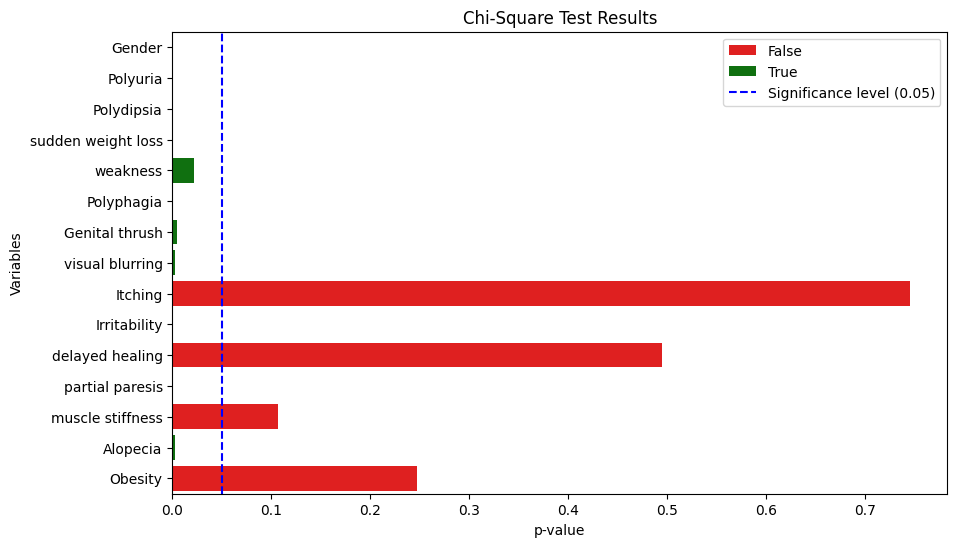

In [459]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

dependent_var = 'class'
independent_vars = [col for col in df.select_dtypes(include=['object', 'category']).columns if col != dependent_var]

results = {}
for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[var] = {'chi2': chi2, 'p-value': p}

# แปลงเป็น DataFrame เพื่อการ plot
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index':'Variable'})

# เพิ่มคอลัมน์เพื่อดูว่ามีความสัมพันธ์หรือไม่
results_df['Significant'] = results_df['p-value'] < 0.05

# Bar plot ของ p-value
plt.figure(figsize=(10,6))
sns.barplot(x='p-value', y='Variable', data=results_df, hue='Significant', dodge=False, palette={True:'green', False:'red'})
plt.axvline(0.05, color='blue', linestyle='--', label='Significance level (0.05)')
plt.xlabel('p-value')
plt.ylabel('Variables')
plt.title('Chi-Square Test Results')
plt.legend()
plt.show()


In [460]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Corrected Cramer's V for bias
    return np.sqrt(phi2 / (min(r-1, k-1)))

# คำนวณ Cramer's V สำหรับแต่ละตัวแปร
cramers_results = {}
for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    cramers_results[var] = cramers_v(contingency_table)

# แสดงผล
print("\nCramer's V Results:")
for var, value in cramers_results.items():
    print(f"{var:<20}: {value:.4f}")



Cramer's V Results:
Gender              : 0.2982
Polyuria            : 0.6171
Polydipsia          : 0.5850
sudden weight loss  : 0.3620
weakness            : 0.1455
Polyphagia          : 0.3115
Genital thrush      : 0.1781
visual blurring     : 0.1882
Itching             : 0.0205
Irritability        : 0.2614
delayed healing     : 0.0432
partial paresis     : 0.3549
muscle stiffness    : 0.1021
Alopecia            : 0.1935
Obesity             : 0.0732


C:\Users\majis\AppData\Local\Temp\ipykernel_24484\2785230593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


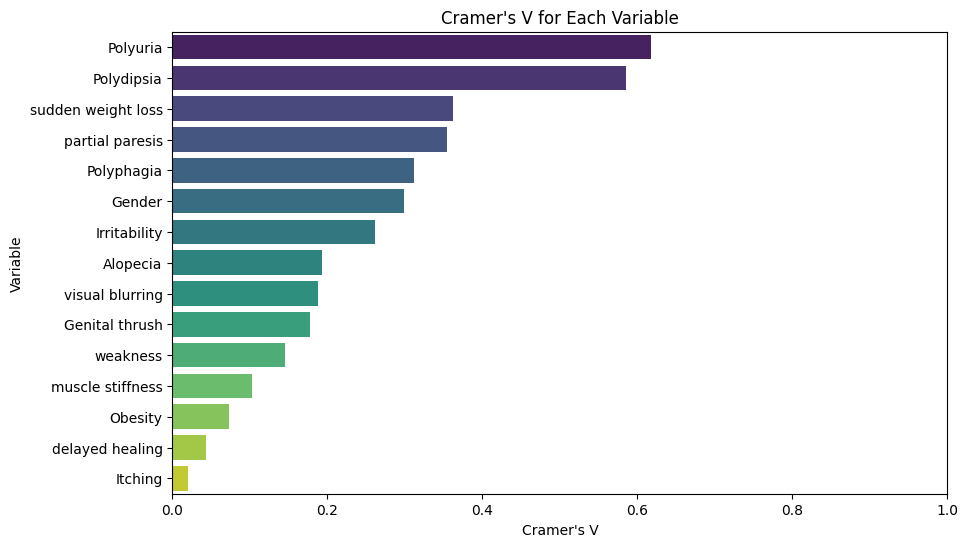

In [461]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# แปลงเป็น DataFrame
cramers_df = pd.DataFrame(list(cramers_results.items()), columns=['Variable', "Cramer's V"])
cramers_df = cramers_df.sort_values("Cramer's V", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Cramer's V", 
    y="Variable", 
    data=cramers_df, 
    palette=sns.color_palette("viridis", n_colors=len(cramers_df))
)
plt.title("Cramer's V for Each Variable")
plt.xlabel("Cramer's V")
plt.ylabel("Variable")
plt.xlim(0,1)
plt.show()


In [462]:
def contingency_coefficient(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (chi2 + n))

# คำนวณ Contingency Coefficient สำหรับแต่ละตัวแปร
contingency_results = {}
for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    contingency_results[var] = contingency_coefficient(contingency_table)

# แสดงผล
print("\nContingency Coefficient Results:")
for var, value in contingency_results.items():
    print(f"{var:<20}: {value:.4f}")



Contingency Coefficient Results:
Gender              : 0.2858
Polyuria            : 0.5252
Polydipsia          : 0.5050
sudden weight loss  : 0.3404
weakness            : 0.1440
Polyphagia          : 0.2974
Genital thrush      : 0.1753
visual blurring     : 0.1849
Itching             : 0.0205
Irritability        : 0.2529
delayed healing     : 0.0431
partial paresis     : 0.3345
muscle stiffness    : 0.1016
Alopecia            : 0.1900
Obesity             : 0.0730


C:\Users\majis\AppData\Local\Temp\ipykernel_24484\1577725046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


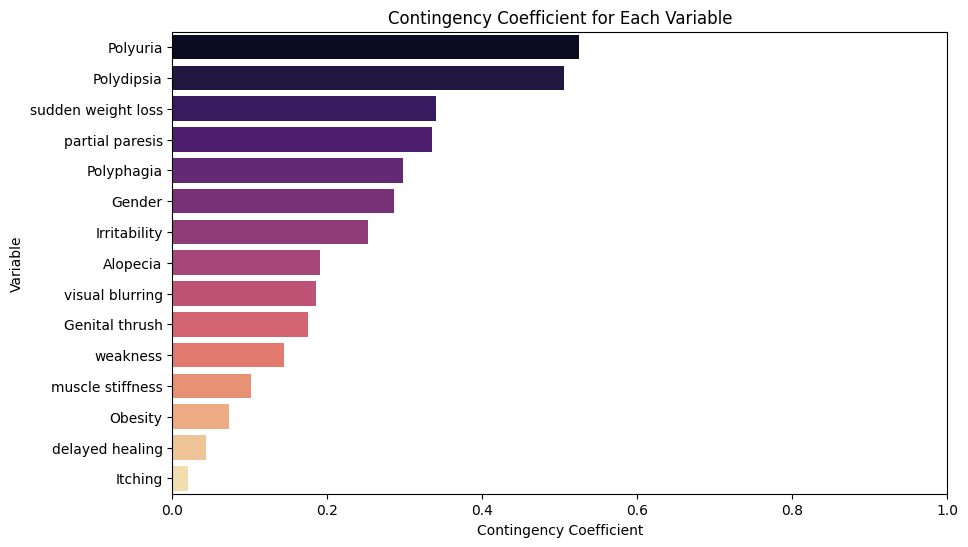

In [463]:
cont_df = pd.DataFrame(list(contingency_results.items()), columns=['Variable', 'Contingency Coefficient'])
cont_df = cont_df.sort_values('Contingency Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Contingency Coefficient',
    y='Variable',
    data=cont_df,
    palette=sns.color_palette("magma", n_colors=len(cont_df))
)
plt.title('Contingency Coefficient for Each Variable')
plt.xlabel('Contingency Coefficient')
plt.ylabel('Variable')
plt.xlim(0,1)
plt.show()


# เตรียมพร้อมดำเนินเทรน 

Model ที่ใช้ : Logistic regression, Random Forest, Decision Tree
มีแค่ Logistic ที่ใช้ข้อมูลแบบ Scaled แล้ว

In [464]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

In [465]:
# Categorical columns formatt
mapping = {
    'yes': 1,
    'no': 0,
    'positive': 1,
    'negative': 0,
    'male' : 0,
    'female' : 1
}

for col in cat_cols:
    # Lower string and strip spaces
    df[col] = df[col].astype(str).str.lower().str.strip()

    # แปลงค่าตาม mapping
    df[col] = df[col].replace(mapping)

C:\Users\majis\AppData\Local\Temp\ipykernel_24484\2891016739.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)
C:\Users\majis\AppData\Local\Temp\ipykernel_24484\2891016739.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)
C:\Users\majis\AppData\Local\Temp\ipykernel_24484\2891016739.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [466]:
from sklearn.preprocessing import StandardScaler

# clone df
scaled_df = df.copy()

# scale numeric columns
scaler = StandardScaler()
scaled_df[num_cols] = scaler.fit_transform(df[num_cols])

print("✔ Numeric features scaled into scaled_df")

✔ Numeric features scaled into scaled_df


In [467]:
# Non scaled Data - Use for Random Forest, Decision Tree
df.tail(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [468]:
# Scaled Data - Use for Logistic Regression
scaled_df.tail(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,-0.791722,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,-0.057135,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.759074,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,-1.363068,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,-0.546860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model 1 : Logistic Regression

In [469]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# สมมติว่า df คือ DataFrame ของคุณ
# แยก features กับ label
X = scaled_df.drop('class', axis=1)
y = scaled_df['class']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (200, 16)
Shape X_test: (50, 16)


🔥Logistic Regression

Accuracy: 0.88
ROC AUC: 0.9448529411764706

Classification report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.82      0.90        34

    accuracy                           0.88        50
   macro avg       0.86      0.91      0.87        50
weighted avg       0.91      0.88      0.88        50



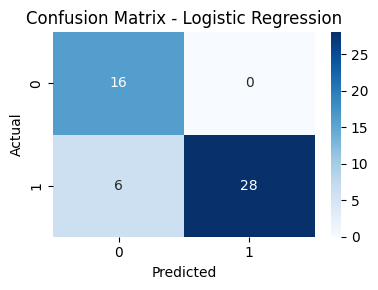

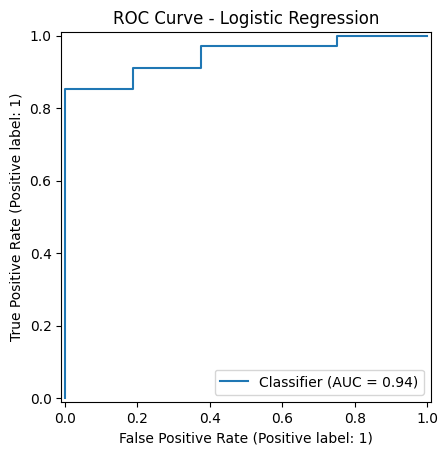

In [470]:
# การจัดการข้อมูล
import pandas as pd
import numpy as np

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:, 1]

print("🔥Logistic Regression\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification report:\n", classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba_lr)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# Model 2 : Decision Tree

===== Decision Tree =====
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.94      0.94      0.94        32

    accuracy                           0.92        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.92      0.92      0.92        50


Confusion Matrix:
[[16  2]
 [ 2 30]]


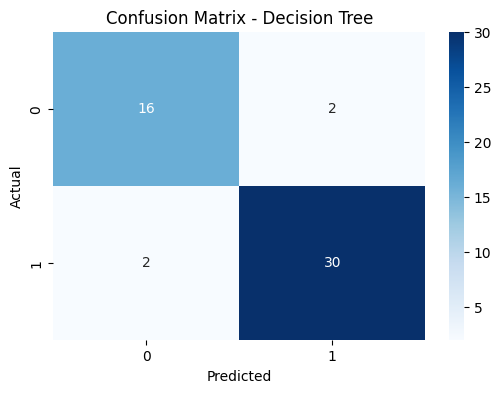


Feature Importance (Decision Tree):
               Feature  Importance
2             Polyuria    0.386047
3           Polydipsia    0.138204
14            Alopecia    0.110640
0                  Age    0.106546
1               Gender    0.052867
4   sudden weight loss    0.047619
13    muscle stiffness    0.029762
7       Genital thrush    0.028571
10        Irritability    0.026600
11     delayed healing    0.022789
9              Itching    0.019841
5             weakness    0.011905
8      visual blurring    0.011905
12     partial paresis    0.005766
15             Obesity    0.000937
6           Polyphagia    0.000000


In [471]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# เตรียมข้อมูล (ใช้ df ไม่สเกล)
# -----------------------------
X = df.drop('class', axis=1)
y = df['class']

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Decision Tree
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("===== Decision Tree =====")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# -----------------------------
# Visual Confusion Matrix
# -----------------------------
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
fi_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Decision Tree):")
print(fi_dt)


# Model 3 : RandomForest

===== Random Forest =====
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.91      0.97      0.94        32

    accuracy                           0.92        50
   macro avg       0.92      0.90      0.91        50
weighted avg       0.92      0.92      0.92        50


Confusion Matrix:
[[15  3]
 [ 1 31]]


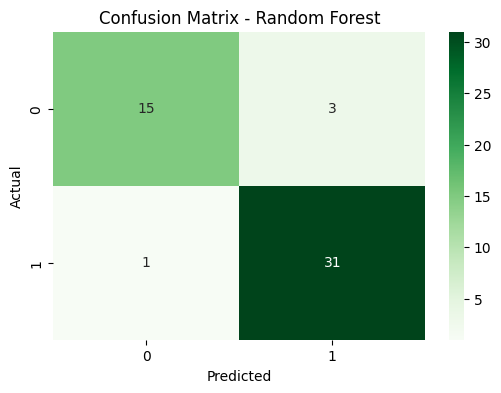


Feature Importance (Random Forest):
               Feature  Importance
2             Polyuria    0.209889
3           Polydipsia    0.173519
0                  Age    0.118139
1               Gender    0.062550
6           Polyphagia    0.053236
10        Irritability    0.042594
14            Alopecia    0.040947
12     partial paresis    0.040061
4   sudden weight loss    0.038807
7       Genital thrush    0.038013
11     delayed healing    0.037305
8      visual blurring    0.036726
9              Itching    0.034626
13    muscle stiffness    0.028654
5             weakness    0.028122
15             Obesity    0.016813


In [472]:
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# เตรียมข้อมูล (df ไม่สเกล)
# -----------------------------
X = df.drop('class', axis=1)
y = df['class']

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("===== Random Forest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# -----------------------------
# Visual Confusion Matrix
# -----------------------------
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
fi_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(fi_rf)
